### 문장 단위 쪼개기



In [60]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('vader_lexicon')

daraz = pd.read_csv("C:\\Users\\rud92\\Machine_learning_Project\\Daraz Online Shopping App.csv")


### 문장 단위로 분해 & 새로운 DF 만들기 
new_rows = []
for idx, row in daraz.iterrows():
    original_row_number = idx

    content_text = row['content']
    score = row['score']
    
    sentences = sent_tokenize(content_text)
    

    for sent in sentences:
        new_rows.append({
            'original_row_number': original_row_number,  
            'sentence': sent.strip(), 
            'score': score
        })

df_sentences = pd.DataFrame(new_rows)



##전처리 +피처벡터화 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import sent_tokenize
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


##content 전처리

# 불용어 리스트
custom_stopwords = set(stopwords.words('english')).union({"want", "on", "buy", "give", "every", "single", "pop", "one", "look", "is", "the", "and", "it", "very", "to", "this", "for", "of", "in", "on", "have", "app"})

# 어간, 표제어 추출기  --> 어근이 제대로 안 나와서 PorterStemmer라는 걸 추가로 활용했어요!
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# 텍스트 전처리 함수 정의
def preprocess_text(text):
    if not isinstance(text, str):  # NaN 방지
        return ""

    # 클렌징
    text = text.lower() 
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip() 

    # 토큰화
    tokens = word_tokenize(text)

    # 불용어 제거
    tokens = [word for word in tokens if word not in custom_stopwords]

    # 어근 추출 및 표제어 추출(pos 태그 verb로 설정)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word, pos="v") for word in tokens]

    #중복 단어 제거
    tokens = list(dict.fromkeys(tokens))

    return ' '.join(tokens)


df_sentences['preprocessed_sentence'] = df_sentences['sentence'].apply(preprocess_text)


# 피처벡터화

# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_sentences['preprocessed_sentence'], test_size=0.2, random_state=42)


# 1.2. TF-IDF 기반의 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
df_sentences.head(6)

##문장 단위로 잘 나뉨

,original_row_number,sentence,score
0,0,"App is now bombarded with ads, making it feel ...",3
1,0,The website really has lost its class.,3
2,0,They charge you for doing cash on delivery.,3
3,0,"Ads pop up after every single tap, which is fr...",3
4,0,But I have to give props to their customer ser...,3
5,1,The search is by far the most atrocious aspect...,1


#### 전처리 + 피처벡터화 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
# 피처벡터화

# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_sentences['preprocessed_sentence'], test_size=0.2, random_state=42)


# 1.2. TF-IDF 기반의 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# 2. 성능 비교

# 2.1. 자주 등장하는 단어 출력 함수
def top_words(vectorizer, X, top_n=30):
    words = vectorizer.get_feature_names_out() # 벡터화된 데이터에서 고유한 단어들을 반환하는 함수
    word_freq = X.sum(axis=0).A1  # .sum(axis=0)은 각 단어의 등장횟수 계산
                                   # .A1은 희소->밀집 행렬 변환 메서드
    wofr_pair = list(zip(words, word_freq)) # 단어-등장횟수 페어 만들기
    wofr_pair = sorted(wofr_pair, key=lambda x: x[1], reverse=True)[:top_n] # 내림차순 정렬 후 상위 n개 추출
    return wofr_pair
 

# 2.3. TF-IDF 상위 단어 추출
tfidf_top_words = top_words(tfidf_vect, X_train_tfidf)
print("TF-IDF에서 자주 등장하는 상위 30개 단어:")
for word, count in tfidf_top_words:
    print(f"{word}: {count}")

TF-IDF에서 자주 등장하는 상위 30개 단어:
app: 4291.747395152117
good: 3515.9953937959344
daraz: 2862.0220122711657
shop: 2737.520966973573
product: 2432.777636402127
online: 2072.320361979868
order: 1798.1002692008258
delivery: 1772.0301906654338
best: 1615.932163048978
service: 1538.7123989576346
time: 1413.5201053002618
experience: 1246.4700918940298
bad: 1206.0216860428288
use: 1134.7441525276156
thing: 1105.8862603560244
thank: 1069.584236743311
quality: 987.2327483891414
get: 975.5213707401991
like: 948.3697090216796
love: 942.5090589068585
item: 937.0311153017166
easy: 930.9187777530237
dont: 925.6539510934059
nice: 915.971865108684
great: 864.1000915534013
much: 809.0138731463376
worst: 789.6288913194321
customer: 777.6439020299902
charge: 763.5730026712911
show: 753.4716198101592


#### 오버샘플링

오버 샘플링의 경우 별점 내용 때문에 도입한 내용이었는데, 문장 단위 분류 후 감성 분석 점수를 확인하는 과정에서는 별점 정보를 꼭 사용해야 할까...? 
별점 정보는 감성 점수랑 비교해서 보는 과정이 있으면 좋을 것 같아서 넣었음.
그러나 딱히 오버 샘플링이 필요하지 않아 생략했음

#### 감성 분석 

In [5]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

## nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df_sentences['sentiment_score'] = df_sentences['preprocessed_sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])

print(df_sentences[['preprocessed_sentence', 'sentiment_score']])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                   preprocessed_sentence  sentiment_score
0      app bombard ad make feel cheap fraudulent website          -0.4939
1                              website really lose class          -0.4576
2                                   charge cash delivery           0.0000
3                  ad tap frustrate want bombard useless          -0.6705
4                   prop customer service delivery whole           0.0000
...                                                  ...              ...
96689                                           easy use           0.4404
96690                                           love app           0.6369
96691         helpful thankyou thankful team daraz happy           0.8807
96692                                easy wasy shop home           0.4404
96693                                   amaze unique app           0.5423

[96694 rows x 2 columns]


In [56]:
df_sentences

,original_row_number,sentence,score,preprocessed_sentence,sentiment_score
0,0,"App is now bombarded with ads, making it feel ...",3,app bombard ad make feel cheap fraudulent website,-0.4939
1,0,The website really has lost its class.,3,website really lose class,-0.4576
2,0,They charge you for doing cash on delivery.,3,charge cash delivery,0.0000
3,0,"Ads pop up after every single tap, which is fr...",3,ad tap frustrate want bombard useless,-0.6705
4,0,But I have to give props to their customer ser...,3,prop customer service delivery whole,0.0000
...,...,...,...,...,...
96689,53996,Very easy to use.,5,easy use,0.4404
96690,53996,I love this app.,5,love app,0.6369
96691,53997,This is very helpful thankyou very very thankf...,5,helpful thankyou thankful team daraz happy,0.8807
96692,53998,Easy wasy to shop at home,4,easy wasy shop home,0.4404


   original_row_number  avg_sentiment_score  score
0                    0            -0.324400      3
1                    1            -0.132225      1
2                    2             0.032800      1
3                    3            -0.154888      3
4                    4            -0.146529      1


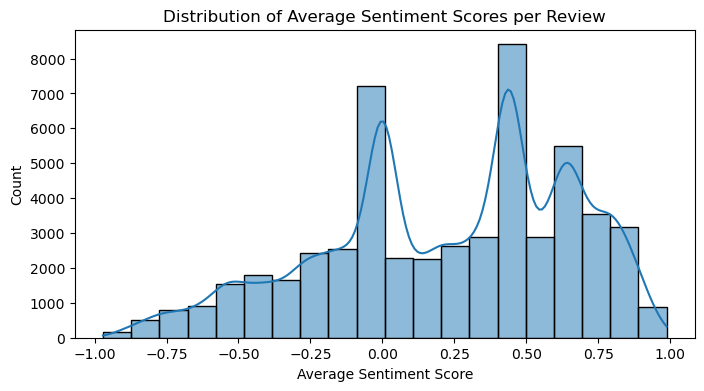

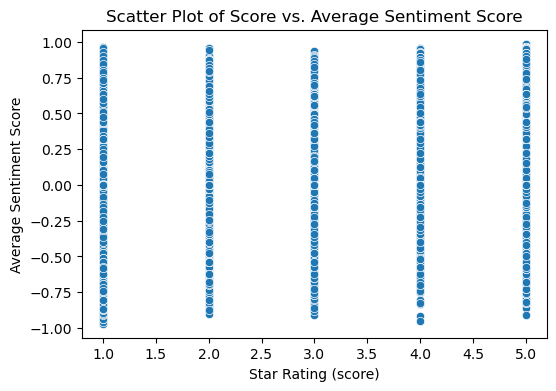

Correlation between star rating and average sentiment score: 0.6745


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_review_sentiment = (
    df_sentences
    .groupby('original_row_number')['sentiment_score']
    .mean()
    .to_frame('avg_sentiment_score')  
)

df_review_sentiment = df_review_sentiment.join(daraz['score'])

df_review_sentiment.reset_index(inplace=True)

print(df_review_sentiment.head())


# 리뷰별 평균 감성 점수와 별점
plt.figure(figsize=(8,4))
sns.histplot(df_review_sentiment['avg_sentiment_score'], kde=True, bins=20)
plt.title('Distribution of Average Sentiment Scores per Review')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Count')
plt.show()

# 별점, 평균 감성 점수 간의 관계
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_review_sentiment, x='score', y='avg_sentiment_score')
plt.title('Scatter Plot of Score vs. Average Sentiment Score')
plt.xlabel('Star Rating (score)')
plt.ylabel('Average Sentiment Score')
plt.show()

# 상관계수
corr_value = df_review_sentiment['score'].corr(df_review_sentiment['avg_sentiment_score'])
print(f"Correlation between star rating and average sentiment score: {corr_value:.4f}")

### 5차 회의 자료 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import sent_tokenize
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


## nltk.download('punkt_tab')

daraz2 = pd.read_csv(r"C:\Users\rud92\Machine_learning_Project\Daraz Online Shopping App.csv")

## 칼럼 정리
daraz2 = daraz.drop(columns=['reviewId', 'replyContent', 'repliedAt', 'at'])

def assign_category(x):
    if x == 0:
        return 0
    elif 1 <= x <= 5:
        return 1
    elif 5 < x <= 10:
        return 2
    elif 11 <= x <= 50:
        return 3
    elif 51 <= x <= 100:
        return 4
    else:
        return 5

daraz2['category'] = daraz2['thumbsUpCount'].apply(assign_category)

##content 전처리

# 불용어 리스트
custom_stopwords = set(stopwords.words('english')).union({"want", "on", "buy", "give", "every", "single", "pop", "one", "look"})

# 어간, 표제어 추출기  --> 어근이 제대로 안 나와서 PorterStemmer라는 걸 추가로 활용했어요!
lemmatizer2 = WordNetLemmatizer()
stemmer2 = PorterStemmer()

# 텍스트 전처리 함수 정의
def preprocess_text(text):
    if not isinstance(text, str):  # NaN 방지
        return ""

    # 클렌징
    text = text.lower() 
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip() 

    # 토큰화
    tokens2 = word_tokenize(text)

    # 불용어 제거
    tokens2 = [word for word in tokens2 if word not in custom_stopwords]

    # 어근 추출 및 표제어 추출(pos 태그 verb로 설정)
    tokens2 = [lemmatizer2.lemmatize(word) for word in tokens2]
    tokens2 = [lemmatizer2.lemmatize(word, pos="v") for word in tokens2]

    #중복 단어 제거
    tokens2 = list(dict.fromkeys(tokens2))

    return ' '.join(tokens2)

daraz2['content'] = daraz2['content'].apply(preprocess_text)



# 피처벡터화

# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train2, X_test2 = train_test_split(daraz2['content'], test_size=0.2, random_state=42)


# 1.2. TF-IDF 기반의 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train2)
X_train_tfidf = tfidf_vect.transform(X_train2)
X_test_tfidf = tfidf_vect.transform(X_test2)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
# 피처벡터화

# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train2, X_test2 = train_test_split(daraz2['content'], test_size=0.2, random_state=42)


# 1.2. TF-IDF 기반의 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train2)
X_train_tfidf = tfidf_vect.transform(X_train2)
X_test_tfidf = tfidf_vect.transform(X_test2)

In [13]:
#부정적 리뷰(평점 1~2) 필터링
negative_reviews = daraz2[daraz2['score'] <= 2]['content'].dropna()

# 토픽 모델링 (LDA 적용)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = count_vectorizer.fit_transform(negative_reviews)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

# 토픽별 주요 키워드 출력
print("\n토픽 모델링 결과:")
words = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"\n📌 Topic {topic_idx + 1}:")
    print(", ".join([words[i] for i in topic.argsort()[:-11:-1]]))


토픽 모델링 결과:

📌 Topic 1:
service, daraz, customer, order, delivery, worst, day, online, time, shop

📌 Topic 2:
product, order, app, bad, quality, daraz, time, dont, fake, thing

📌 Topic 3:
app, product, good, update, slow, daraz, search, like, new, bad

📌 Topic 4:
app, work, order, problem, daraz, try, time, use, say, fix

📌 Topic 5:
delivery, charge, price, product, daraz, high, cash, pay, point, item


In [15]:
!pip install textblob

## 감정 분석 수행 및 감정 점수 포함
from textblob import TextBlob

# 감정 분석 점수 계산 (TextBlob 활용)
daraz2['sentiment_score'] = daraz2['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# 감정 분류 함수
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

daraz2['sentiment'] = daraz2['sentiment_score'].apply(categorize_sentiment)

# 감정 분석 결과 출력
print(daraz2[['content', 'sentiment_score', 'sentiment']].head())

                                             content  sentiment_score  \
0  app bombard ad make feel cheap fraudulent webs...         0.075000   
1  search far atrocious aspect app daraz general ...         0.040833   
2  recently experience service would like provide...        -0.333333   
3  much ad notification option disable device sys...        -0.100000   
4  update redesign even uglier front end still bu...         0.059375   

  sentiment  
0   Neutral  
1   Neutral  
2  Negative  
3   Neutral  
4   Neutral  


In [17]:
print(df_sentences)

       original_row_number                                           sentence  \
0                        0  App is now bombarded with ads, making it feel ...   
1                        0             The website really has lost its class.   
2                        0        They charge you for doing cash on delivery.   
3                        0  Ads pop up after every single tap, which is fr...   
4                        0  But I have to give props to their customer ser...   
...                    ...                                                ...   
96689                53996                                  Very easy to use.   
96690                53996                                   I love this app.   
96691                53997  This is very helpful thankyou very very thankf...   
96692                53998                          Easy wasy to shop at home   
96693                53999                          Amazing and so unique app   

       score               

In [19]:
print(df_review_sentiment)

       original_row_number  avg_sentiment_score  score
0                        0            -0.324400      3
1                        1            -0.132225      1
2                        2             0.032800      1
3                        3            -0.154888      3
4                        4            -0.146529      1
...                    ...                  ...    ...
53995                53995             0.443000      5
53996                53996             0.538650      5
53997                53997             0.880700      5
53998                53998             0.440400      4
53999                53999             0.542300      5

[54000 rows x 3 columns]


In [21]:
import pandas as pd
import numpy as np

def assign_sentiment_label(score):
    if score <= -0.1:
        return "Negative"
    elif score >= 0.1:
        return "Positive"
    else:
        return "Neutral"

df_sentences['sentiment_label'] = df_sentences['sentiment_score'].apply(assign_sentiment_label)

In [23]:
print(df_sentences)

       original_row_number                                           sentence  \
0                        0  App is now bombarded with ads, making it feel ...   
1                        0             The website really has lost its class.   
2                        0        They charge you for doing cash on delivery.   
3                        0  Ads pop up after every single tap, which is fr...   
4                        0  But I have to give props to their customer ser...   
...                    ...                                                ...   
96689                53996                                  Very easy to use.   
96690                53996                                   I love this app.   
96691                53997  This is very helpful thankyou very very thankf...   
96692                53998                          Easy wasy to shop at home   
96693                53999                          Amazing and so unique app   

       score               

In [25]:
sentiment_counts = df_sentences.groupby('original_row_number')['sentiment_label'].value_counts().unstack(fill_value=0)
sentiment_counts['total_sentences'] = sentiment_counts.sum(axis=1)


sentiment_counts['negative_ratio'] = sentiment_counts['Negative'] / sentiment_counts['total_sentences']
sentiment_counts['neutral_ratio'] = sentiment_counts['Neutral'] / sentiment_counts['total_sentences']
sentiment_counts['positive_ratio'] = sentiment_counts['Positive'] / sentiment_counts['total_sentences']

print(sentiment_counts)

sentiment_label      Negative  Neutral  Positive  total_sentences  \
original_row_number                                                 
0                           3        2         0                5   
1                           3        0         1                4   
2                           1        1         1                3   
3                           2        6         0                8   
4                           3        2         2                7   
...                       ...      ...       ...              ...   
53995                       0        1         1                2   
53996                       0        0         2                2   
53997                       0        0         1                1   
53998                       0        0         1                1   
53999                       0        0         1                1   

sentiment_label      negative_ratio  neutral_ratio  positive_ratio  
original_row_number              

In [27]:
# sentiment_counts의 필요한 칼럼만 선택 (비율 칼럼)
sentiment_ratios = sentiment_counts[['negative_ratio', 'neutral_ratio', 'positive_ratio']].reset_index()

print(sentiment_ratios)

sentiment_label  original_row_number  negative_ratio  neutral_ratio  \
0                                  0        0.600000       0.400000   
1                                  1        0.750000       0.000000   
2                                  2        0.333333       0.333333   
3                                  3        0.250000       0.750000   
4                                  4        0.428571       0.285714   
...                              ...             ...            ...   
53995                          53995        0.000000       0.500000   
53996                          53996        0.000000       0.000000   
53997                          53997        0.000000       0.000000   
53998                          53998        0.000000       0.000000   
53999                          53999        0.000000       0.000000   

sentiment_label  positive_ratio  
0                      0.000000  
1                      0.250000  
2                      0.333333  
3          

In [29]:
# df_review_sentiment와 merge
df_review_sentiment = df_review_sentiment.merge(sentiment_ratios, on='original_row_number', how='left')

print(df_review_sentiment)

       original_row_number  avg_sentiment_score  score  negative_ratio  \
0                        0            -0.324400      3        0.600000   
1                        1            -0.132225      1        0.750000   
2                        2             0.032800      1        0.333333   
3                        3            -0.154888      3        0.250000   
4                        4            -0.146529      1        0.428571   
...                    ...                  ...    ...             ...   
53995                53995             0.443000      5        0.000000   
53996                53996             0.538650      5        0.000000   
53997                53997             0.880700      5        0.000000   
53998                53998             0.440400      4        0.000000   
53999                53999             0.542300      5        0.000000   

       neutral_ratio  positive_ratio  
0           0.400000        0.000000  
1           0.000000        0.250

In [31]:
def assign_review_sentiment(avg_score):
    if avg_score <= -0.1:
        return "Negative"
    elif avg_score >= 0.1:
        return "Positive"
    else:
        return "Neutral"

df_review_sentiment['sentiment_label'] = df_review_sentiment['avg_sentiment_score'].apply(assign_review_sentiment)

In [33]:
df_review_sentiment.head

<bound method NDFrame.head of        original_row_number  avg_sentiment_score  score  negative_ratio  \
0                        0            -0.324400      3        0.600000   
1                        1            -0.132225      1        0.750000   
2                        2             0.032800      1        0.333333   
3                        3            -0.154888      3        0.250000   
4                        4            -0.146529      1        0.428571   
...                    ...                  ...    ...             ...   
53995                53995             0.443000      5        0.000000   
53996                53996             0.538650      5        0.000000   
53997                53997             0.880700      5        0.000000   
53998                53998             0.440400      4        0.000000   
53999                53999             0.542300      5        0.000000   

       neutral_ratio  positive_ratio sentiment_label  
0           0.400000      

In [35]:
positive_reviews = df_review_sentiment[df_review_sentiment['sentiment_label'] == 'Positive']

print(positive_reviews.head())
print("긍정 리뷰 수:", len(positive_reviews))

    original_row_number  avg_sentiment_score  score  negative_ratio  \
8                     8             0.418125      5        0.250000   
12                   12             0.522180      5        0.000000   
16                   16             0.190633      1        0.000000   
18                   18             0.271400      3        0.200000   
19                   19             0.224617      4        0.333333   

    neutral_ratio  positive_ratio sentiment_label  
8        0.000000        0.750000        Positive  
12       0.200000        0.800000        Positive  
16       0.666667        0.333333        Positive  
18       0.400000        0.400000        Positive  
19       0.166667        0.500000        Positive  
긍정 리뷰 수: 32417


C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda

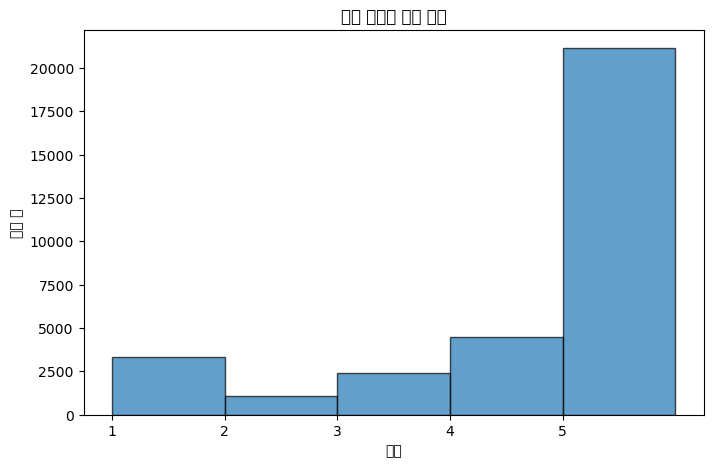

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(positive_reviews['score'], bins=range(1, 7), edgecolor='k', alpha=0.7)
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.title('긍정 리뷰의 별점 분포')
plt.xticks(range(1, 6))
plt.show()

In [37]:
negative_reviews = df_review_sentiment[df_review_sentiment['sentiment_label'] == 'Negative']
neutral_reviews = df_review_sentiment[df_review_sentiment['sentiment_label'] == 'Neutral']

print("부정 리뷰 수:", len(negative_reviews))
print("중립 리뷰 수:", len(neutral_reviews))

부정 리뷰 수: 12128
중립 리뷰 수: 9455


C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\L

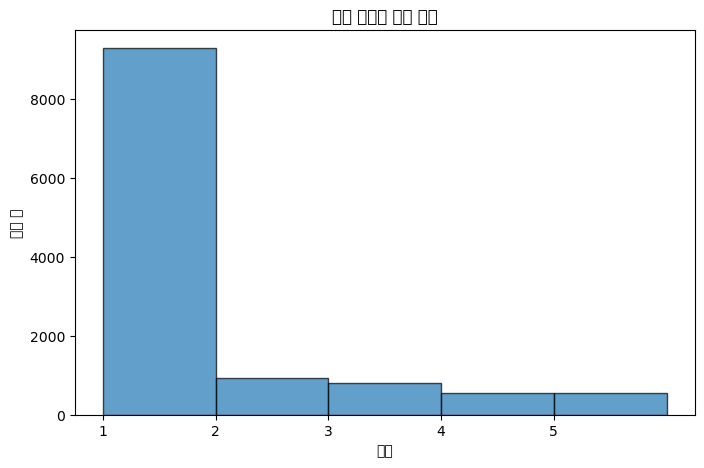

In [46]:
plt.figure(figsize=(8, 5))
plt.hist(negative_reviews['score'], bins=range(1, 7), edgecolor='k', alpha=0.7)
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.title('부정 리뷰의 별점 분포')
plt.xticks(range(1, 6))
plt.show()

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda

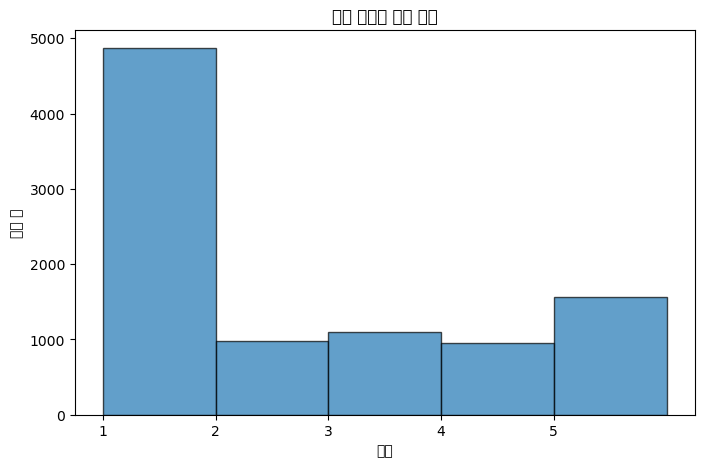

In [48]:
plt.figure(figsize=(8, 5))
plt.hist(neutral_reviews['score'], bins=range(1, 7), edgecolor='k', alpha=0.7)
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.title('중립 리뷰의 별점 분포')
plt.xticks(range(1, 6))
plt.show()

C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\1986391688.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentences['preprocessed_sentence'] = positive_sentences['sentence'].apply(preprocess_text)


             word  frequency
6221         good      12893
3564        daraz       9154
13171        shop       8924
11399     product       6391
10086      online       6055
1819         best       5164
3963     delivery       4052
10211       order       3924
14742        time       3029
14568       thing       3025
12977     service       2855
8515         like       2801
4756         easy       2605
15413         use       2568
8697         love       2439
9722         nice       2392
14429       thank       2366
5264   experience       2326
6362        great       2318
6125          get       2071


C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\1986391688.py:39: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\1986391688.py:39: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\1986391688.py:39: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\1986391688.py:39: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\1986391688.py:39: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\1986391688.py:39: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  plt.tight_layout()

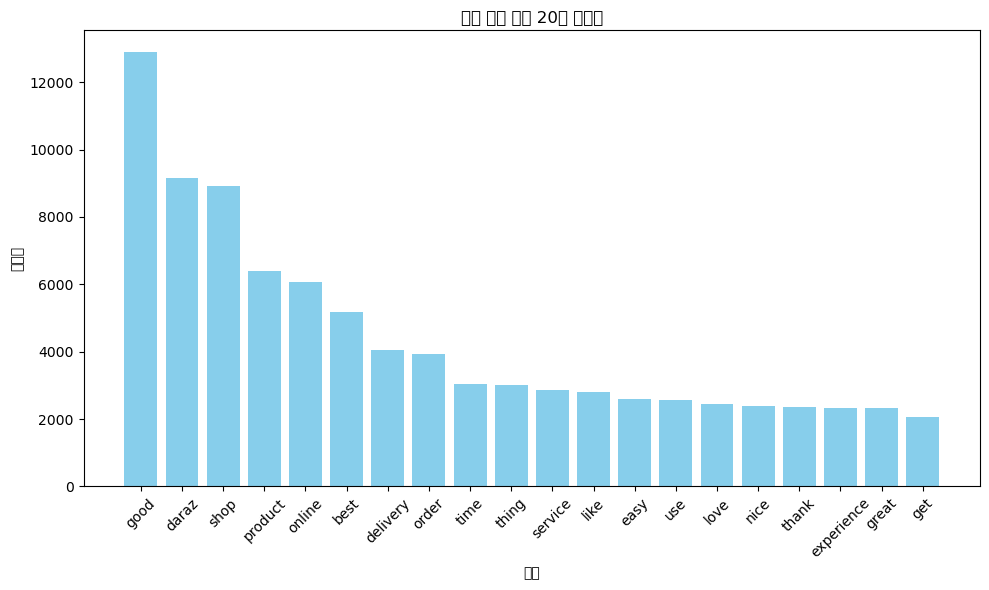

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


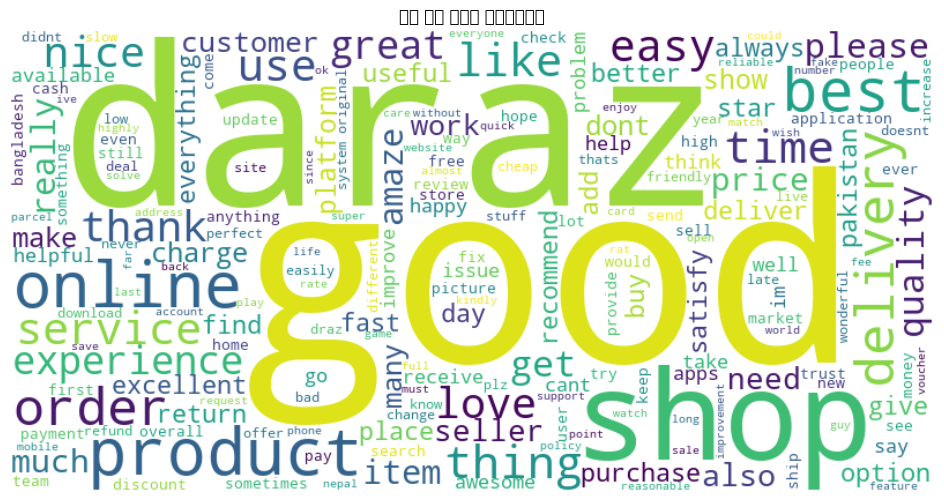

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


df_sentences2 = pd.DataFrame(new_rows)

positive_review_ids = positive_reviews['original_row_number'].unique()
positive_sentences = df_sentences2[df_sentences2['original_row_number'].isin(positive_review_ids)]

positive_sentences['preprocessed_sentence'] = positive_sentences['sentence'].apply(preprocess_text)

# 피처 벡터화 진행
vectorizer = CountVectorizer()
X_positive = vectorizer.fit_transform(positive_sentences['preprocessed_sentence'])


import numpy as np

word_counts = X_positive.sum(axis=0).A1  # 1차원 배열로 변환

vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': vocab, 'frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

print(word_freq_df.head(20))

# 상위 20개 키워드
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(word_freq_df['word'].head(20), word_freq_df['frequency'].head(20), color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.title('긍정 리뷰 상위 20개 키워드')
plt.tight_layout()
plt.show()

# 워드클라우드
from wordcloud import WordCloud

word_freq_dict = dict(zip(word_freq_df['word'], word_freq_df['frequency']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('긍정 리뷰 키워드 워드클라우드')
plt.show()

In [54]:
# 상위 20개 키워드를 리스트로 추출 (이미 word_freq_df에서 정렬된 상태)
top_keywords = word_freq_df.head(20)['word'].tolist()

# 상위 키워드가 문장에 포함되어 있는지 체크하는 함수 정의
def contains_any_keyword(text, keywords):
    # 단순한 문자열 검색: 만약 소문자로 전처리된 텍스트라면 그대로 사용
    return any(keyword in text for keyword in keywords)

# 상위 키워드가 포함된 문장을 필터링
sentences_with_keywords = positive_sentences[positive_sentences['preprocessed_sentence'].apply(lambda x: contains_any_keyword(x, top_keywords))]

# 상위 키워드가 포함되지 않은 문장을 필터링하려면, 위 결과의 반대를 사용
sentences_without_keywords = positive_sentences[~positive_sentences['preprocessed_sentence'].apply(lambda x: contains_any_keyword(x, top_keywords))]

# 결과 확인
print('긍정 리뷰 필터링')
print("키워드 포함 문장 수:", len(sentences_with_keywords))
print("키워드 미포함 문장 수:", len(sentences_without_keywords))

긍정 리뷰 필터링
키워드 포함 문장 수: 42550
키워드 미포함 문장 수: 6836


C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\576899563.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentences['preprocessed_sentence'] = negative_sentences['sentence'].apply(preprocess_text)


             word  frequency
2567        daraz       3913
8564      product       3869
7697        order       3807
990           bad       3071
11006        time       2315
2855     delivery       2238
12119       worst       2008
9790      service       1947
3325         dont       1843
4552          get       1522
3886   experience       1449
4023         fake       1314
5633         item       1277
2468     customer       1227
8813      quality       1207
9995         show       1186
9291       return       1182
11550         use       1165
9943         shop       1126
9714       seller       1115


C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\576899563.py:39: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\576899563.py:39: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\576899563.py:39: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\576899563.py:39: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\576899563.py:39: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\576899563.py:39: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  plt.tight_layout()
C:\Users

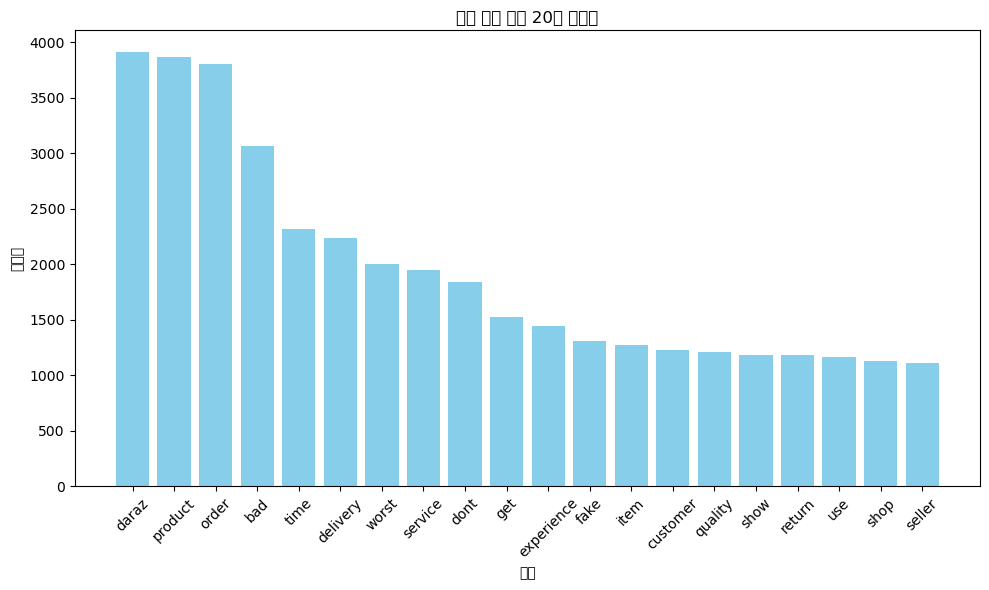

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


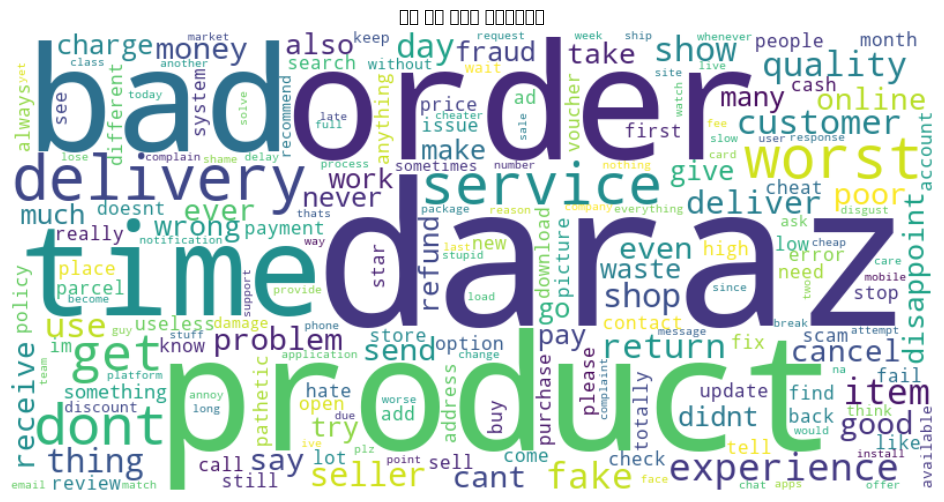

In [64]:
df_sentences2 = pd.DataFrame(new_rows)

negative_review_ids = negative_reviews['original_row_number'].unique()
negative_sentences = df_sentences2[df_sentences2['original_row_number'].isin(negative_review_ids)]

negative_sentences['preprocessed_sentence'] = negative_sentences['sentence'].apply(preprocess_text)

# 피처 벡터화 진행
vectorizer2 = CountVectorizer()
X_negative = vectorizer2.fit_transform(negative_sentences['preprocessed_sentence'])


import numpy as np

word_counts = X_negative.sum(axis=0).A1  # 1차원 배열로 변환

vocab2 = vectorizer2.get_feature_names_out()

word_freq_df2 = pd.DataFrame({'word': vocab2, 'frequency': word_counts})
word_freq_df2 = word_freq_df2.sort_values(by='frequency', ascending=False)

print(word_freq_df2.head(20))

# 상위 20개 키워드
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(word_freq_df2['word'].head(20), word_freq_df2['frequency'].head(20), color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.title('부정 리뷰 상위 20개 키워드')
plt.tight_layout()
plt.show()

# 워드클라우드
from wordcloud import WordCloud

word_freq_dict2 = dict(zip(word_freq_df2['word'], word_freq_df2['frequency']))

wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict2)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('부정 리뷰 키워드 워드클라우드')
plt.show()

C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\812667848.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral_sentences['preprocessed_sentence'] = neutral_sentences['sentence'].apply(preprocess_text)


          word  frequency
2146     daraz       2774
7077   product       2762
6350     order       2406
2353  delivery       2040
9090      time       1496
3804      good       1159
3731       get       1022
4644      item       1013
8238      show       1009
2734      dont       1005
1546    charge        995
8202      shop        898
8083   service        888
9556       use        883
9997      work        805
9011     thing        772
2070  customer        748
2205       day        694
8033    seller        677
1420      cant        668


C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\812667848.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\812667848.py:32: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\812667848.py:32: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\812667848.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\812667848.py:32: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\812667848.py:32: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Use

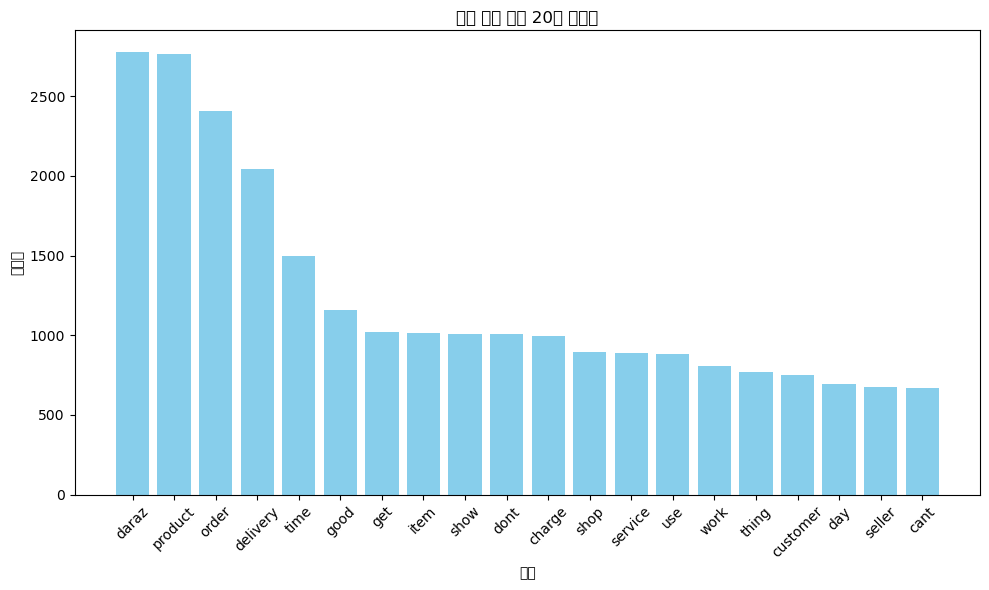

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


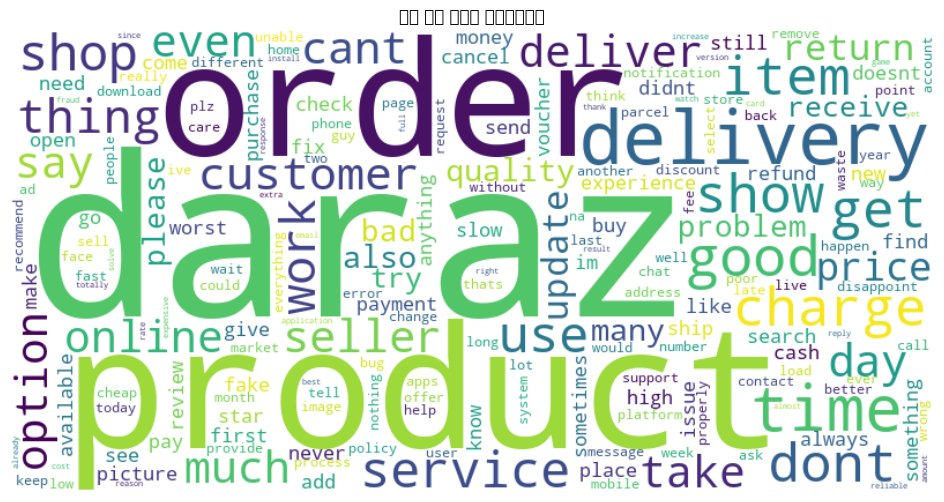

In [70]:
df_sentences2 = pd.DataFrame(new_rows)

neutral_review_ids = neutral_reviews['original_row_number'].unique()
neutral_sentences = df_sentences2[df_sentences2['original_row_number'].isin(neutral_review_ids)]

neutral_sentences['preprocessed_sentence'] = neutral_sentences['sentence'].apply(preprocess_text)

# 피처 벡터화 진행
vectorizer3 = CountVectorizer()
X_neutral = vectorizer3.fit_transform(neutral_sentences['preprocessed_sentence'])


import numpy as np

word_counts3 = X_neutral.sum(axis=0).A1  # 1차원 배열로 변환

vocab3 = vectorizer3.get_feature_names_out()

word_freq_df3 = pd.DataFrame({'word': vocab3, 'frequency': word_counts3})
word_freq_df3 = word_freq_df3.sort_values(by='frequency', ascending=False)

print(word_freq_df3.head(20))

# 상위 20개 키워드

plt.figure(figsize=(10,6))
plt.bar(word_freq_df3['word'].head(20), word_freq_df3['frequency'].head(20), color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.title('중립 리뷰 상위 20개 키워드')
plt.tight_layout()
plt.show()

# 워드클라우드
from wordcloud import WordCloud

word_freq_dict3 = dict(zip(word_freq_df3['word'], word_freq_df3['frequency']))

wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict3)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.title('부정 리뷰 키워드 워드클라우드')
plt.show()

In [ ]:
## 토픽 모델링 

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# CountVectorizer를 사용하여 텍스트를 행렬로 변환
# max_df, min_df, stop_words 등의 파라미터는 데이터 특성에 맞게 조정 가능합니다.
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_positive = vectorizer.fit_transform(positive_sentences['preprocessed_sentence'])

# LDA 모델 학습
# n_components는 토픽의 개수, 데이터에 맞춰 조정
n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics = lda_model.fit_transform(X_positive)

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)

Topic 0: delivery nice good need charge time fast product helpful satisfy
Topic 1: product good quality work service price review improve fix update
Topic 2: daraz thank order customer return service receive say team day
Topic 3: shop online good best daraz experience love great amaze really
Topic 4: good thing product order use daraz easy like time recommend


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# CountVectorizer를 사용하여 텍스트를 행렬로 변환
vectorizer2 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_negative = vectorizer2.fit_transform(negative_sentences['preprocessed_sentence'])

# LDA 모델 학습
n_topics = 5
lda_model2 = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics2 = lda_model2.fit_transform(X_negative)

no_top_words = 10
feature_names2 = vectorizer2.get_feature_names_out()
display_topics(lda_model2, feature_names2, no_top_words)

Topic 0: daraz seller wrong fraud product send item people scam return
Topic 1: order time day poor cancel receive money deliver product waste
Topic 2: experience worst bad daraz work use problem update new try
Topic 3: product bad quality fake daraz shop good online dont thing
Topic 4: delivery service daraz customer charge worst dont bad time problem


In [85]:

vectorizer3 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_neutral = vectorizer3.fit_transform(neutral_sentences['preprocessed_sentence'])

# LDA 모델 학습
n_topics = 5
lda_model3 = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics3 = lda_model3.fit_transform(X_neutral)


no_top_words = 10
feature_names3 = vectorizer3.get_feature_names_out()
display_topics(lda_model3, feature_names3, no_top_words)

Topic 0: delivery charge product high daraz time order ship item cash
Topic 1: order work daraz good time say update day receive use
Topic 2: service daraz customer price address ad product market need star
Topic 3: product time item return money quality daraz seller send deliver
Topic 4: daraz shop online product problem search use good option dont


In [ ]:
## 특이한 리뷰 확인 (감성분석은 긍정, 실제 별점은 부정 뭐 이런 것들)

In [89]:
low_score_reviews = positive_reviews[positive_reviews['score'].isin([1, 2, 3])]

low_score_ids = low_score_reviews['original_row_number'].unique()

low_score_sentences = positive_sentences[positive_sentences['original_row_number'].isin(low_score_ids)]

print("Score가 1,2,3인 리뷰의 문장 수:", len(low_score_sentences))
print(low_score_sentences.head())

Score가 1,2,3인 리뷰의 문장 수: 12150
     original_row_number                                           sentence  \
98                    16  Whoever designed the current UI/UX should be s...   
99                    16  The button to search for a new product vanishe...   
100                   16  The app was already near perfect small changes...   
106                   18  I had a great experience with my first two ord...   
107                   18                    However, I'm now facing issues.   

     score                              preprocessed_sentence  
98       1       whoever design current uiux sack immediately  
99       1  button search new product vanish block clipart...  
100      1  already near perfect small change couldve work...  
106      3  great experience first two order daraz appparc...  
107      3                              however im face issue  


In [93]:
high_score_reviews = negative_reviews[negative_reviews['score'].isin([4,5])]

high_score_ids = high_score_reviews['original_row_number'].unique()

high_score_sentences = negative_sentences[negative_sentences['original_row_number'].isin(high_score_ids)]

print("Score가 4,5인 부정 리뷰의 문장 수:", len(high_score_sentences))
print(high_score_sentences.head())

Score가 4,5인 부정 리뷰의 문장 수: 1731
     original_row_number                                           sentence  \
500                  111                   Daraz has become very bad now 😢.   
501                  111  Searching for a product gives 1/2 the products...   
502                  111                            Delivery fee is extra🫤.   
503                  111   Can't easily talk to an agent with any problem😢.   
504                  111    It has become difficult to find good products.🥺   

     score               preprocessed_sentence  
500      4                    daraz become bad  
501      4          search product give relate  
502      4                  delivery fee extra  
503      4      cant easily talk agent problem  
504      4  become difficult find good product  


In [117]:
high_score_sentences.iloc[0:6][['original_row_number','sentence']]

,original_row_number,sentence
500,111,Daraz has become very bad now 😢.
501,111,Searching for a product gives 1/2 the products...
502,111,Delivery fee is extra🫤.
503,111,Can't easily talk to an agent with any problem😢.
504,111,It has become difficult to find good products.🥺
595,134,Why are you charging seperate delivery charge ...


                                              content  score  thumbsUpCount  \
16  whoever design current uiux sack immediately b...      1             27   
18  great experience first two order daraz appparc...      3             55   
27  yep app lot detail poorly optimize dont like l...      3              8   
29  good experience shop yesterday account log ask...      3              5   
33  great experience shop app however recently bec...      2              8   

                      appName  category  sentiment_score sentiment  
16  Daraz Online Shopping App         3         0.236616  Positive  
18  Daraz Online Shopping App         4         0.440909  Positive  
27  Daraz Online Shopping App         2         0.155556  Positive  
29  Daraz Online Shopping App         1         0.700000  Positive  
33  Daraz Online Shopping App         2         0.400000  Positive  
상위 20개 키워드:
         word  frequency
41        app       2586
375      good       2357
216     daraz       1757

C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\2292487328.py:33: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\2292487328.py:33: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\2292487328.py:33: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\2292487328.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\2292487328.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_28576\2292487328.py:33: UserWarning: Glyph 45230 (\N{HANGUL SYLLABLE NAJ}) missing from current font.
  plt.tight_layout()
C

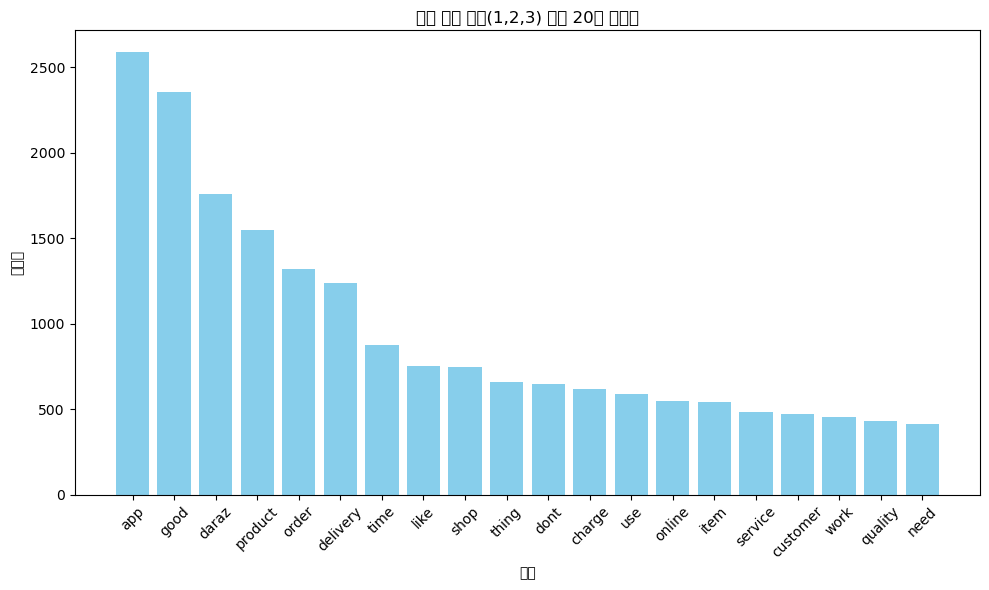

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


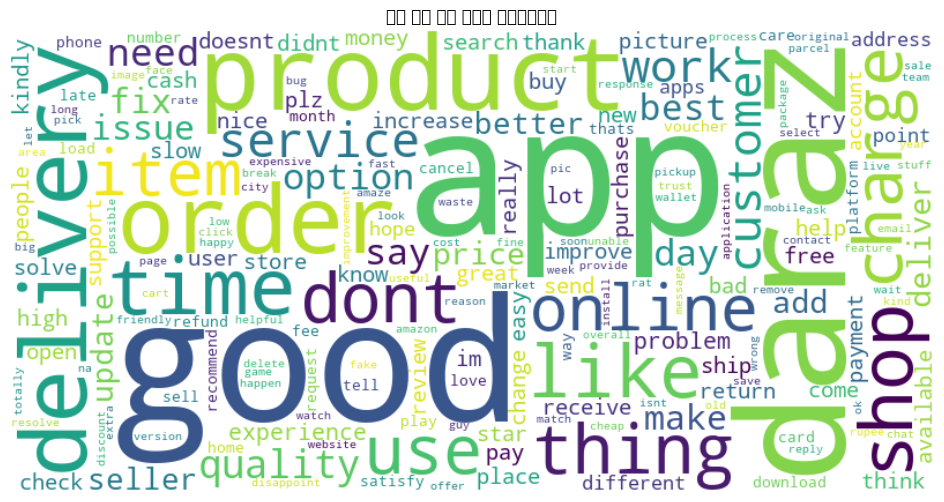

In [127]:
low_score_ids = low_score_reviews.index.unique()

low_score_contents = daraz2.loc[low_score_ids]

print(low_score_contents.head())

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

low_score_ids = low_score_reviews.index.unique()
low_score_contents = daraz2.loc[low_score_ids, 'content']

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_low_score = vectorizer.fit_transform(low_score_contents)

word_counts = X_low_score.sum(axis=0).A1  # 희소 행렬을 1차원 배열로 변환
vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': vocab, 'frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

print("상위 20개 키워드:")
print(word_freq_df.head(20))

plt.figure(figsize=(10,6))
plt.bar(word_freq_df['word'].head(20), word_freq_df['frequency'].head(20), color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.title('낮은 별점 리뷰(1,2,3) 상위 20개 키워드')
plt.tight_layout()
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white')\
    .generate_from_frequencies(dict(zip(word_freq_df['word'], word_freq_df['frequency'])))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('낮은 별점 리뷰 키워드 워드클라우드')
plt.show()

In [121]:
low_score_reviews.head

<bound method NDFrame.head of        original_row_number  avg_sentiment_score  score  negative_ratio  \
16                      16             0.190633      1        0.000000   
18                      18             0.271400      3        0.200000   
27                      27             0.168471      3        0.285714   
29                      29             0.467150      3        0.000000   
33                      33             0.155600      2        0.000000   
...                    ...                  ...    ...             ...   
53926                53926             0.659700      2        0.000000   
53948                53948             0.361200      3        0.000000   
53971                53971             0.794700      2        0.000000   
53990                53990             0.421500      3        0.000000   
53993                53993             0.599400      1        0.000000   

       neutral_ratio  positive_ratio sentiment_label  
16          0.666667      

In [129]:
## 긍정 감정, 낮은 별점 토픽모델링 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

low_score_ids = low_score_reviews.index.unique()
low_score_contents = daraz2.loc[low_score_ids, 'content']

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_low_score = vectorizer.fit_transform(low_score_contents)

n_topics = 5  # 토픽 개수 (필요에 따라 조정)
lda_model = LatentDirichletAllocation(n_components=n_topics, 
                                      max_iter=10, 
                                      learning_method='online',
                                      random_state=42)
lda_topics = lda_model.fit_transform(X_low_score)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {' '.join(top_words)}")

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)

Topic 0: app good daraz like need use dont easy update make
Topic 1: good app product shop online daraz quality best order time
Topic 2: order daraz dont customer return product money service seller good
Topic 3: delivery charge good product daraz price order app free high
Topic 4: app issue help daraz order try use work solve problem
